In [37]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_fig
from ad_ied.replay import replay_run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator
from scipy.signal import find_peaks

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'D:\github\ad_ied\results'


In [2]:
df = pd.read_csv(r"D:\github\ad_ied\data\sessions.csv")
df.head()

,Unnamed: 0,basepath
0,0,X:\AD_sessions\AZ10\AZ10_210317_sess2
1,1,X:\AD_sessions\AZ10\AZ10_210322_sess4
2,2,X:\AD_sessions\AZ10\AZ10_210324_sess5
3,3,X:\AD_sessions\AZ10\AZ10_210329_sess6
4,4,X:\AD_sessions\AZ10\AZ10_210412_sess9


In [ ]:
basepath = r"X:\AD_sessions\AZ18\AZ18_221124_sess8"
replay_run.run(basepath)

In [5]:
save_path = r"D:\github\ad_ied\results\replay_v3"
batch_analysis.run(
    df,
    save_path,
    replay_run.run,
    parallel=True,
    traj_shuff=1000,
    verbose=True,
    expand_ripple=0
)

100%|██████████| 29/29 [00:00<00:00, 9689.70it/s]


In [6]:
save_path = r"D:\github\ad_ied\results\replay_v3"

df = replay_run.load_results(save_path,pre_task_post=True,verbose=True)

D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210317_sess2.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210322_sess4.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210324_sess5.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210329_sess6.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210412_sess9.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210419_sess11.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ10_AZ10_210806_sess25.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ11_AZ11_210325_sess1.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ11_AZ11_210422_sess7.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ11_AZ11_210427_sess8.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ12_AZ12_210317_sess2.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ12_AZ12_210323_sess3.pkl
D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ12_AZ12_210325_sess4.p

## Inspect decoding quality

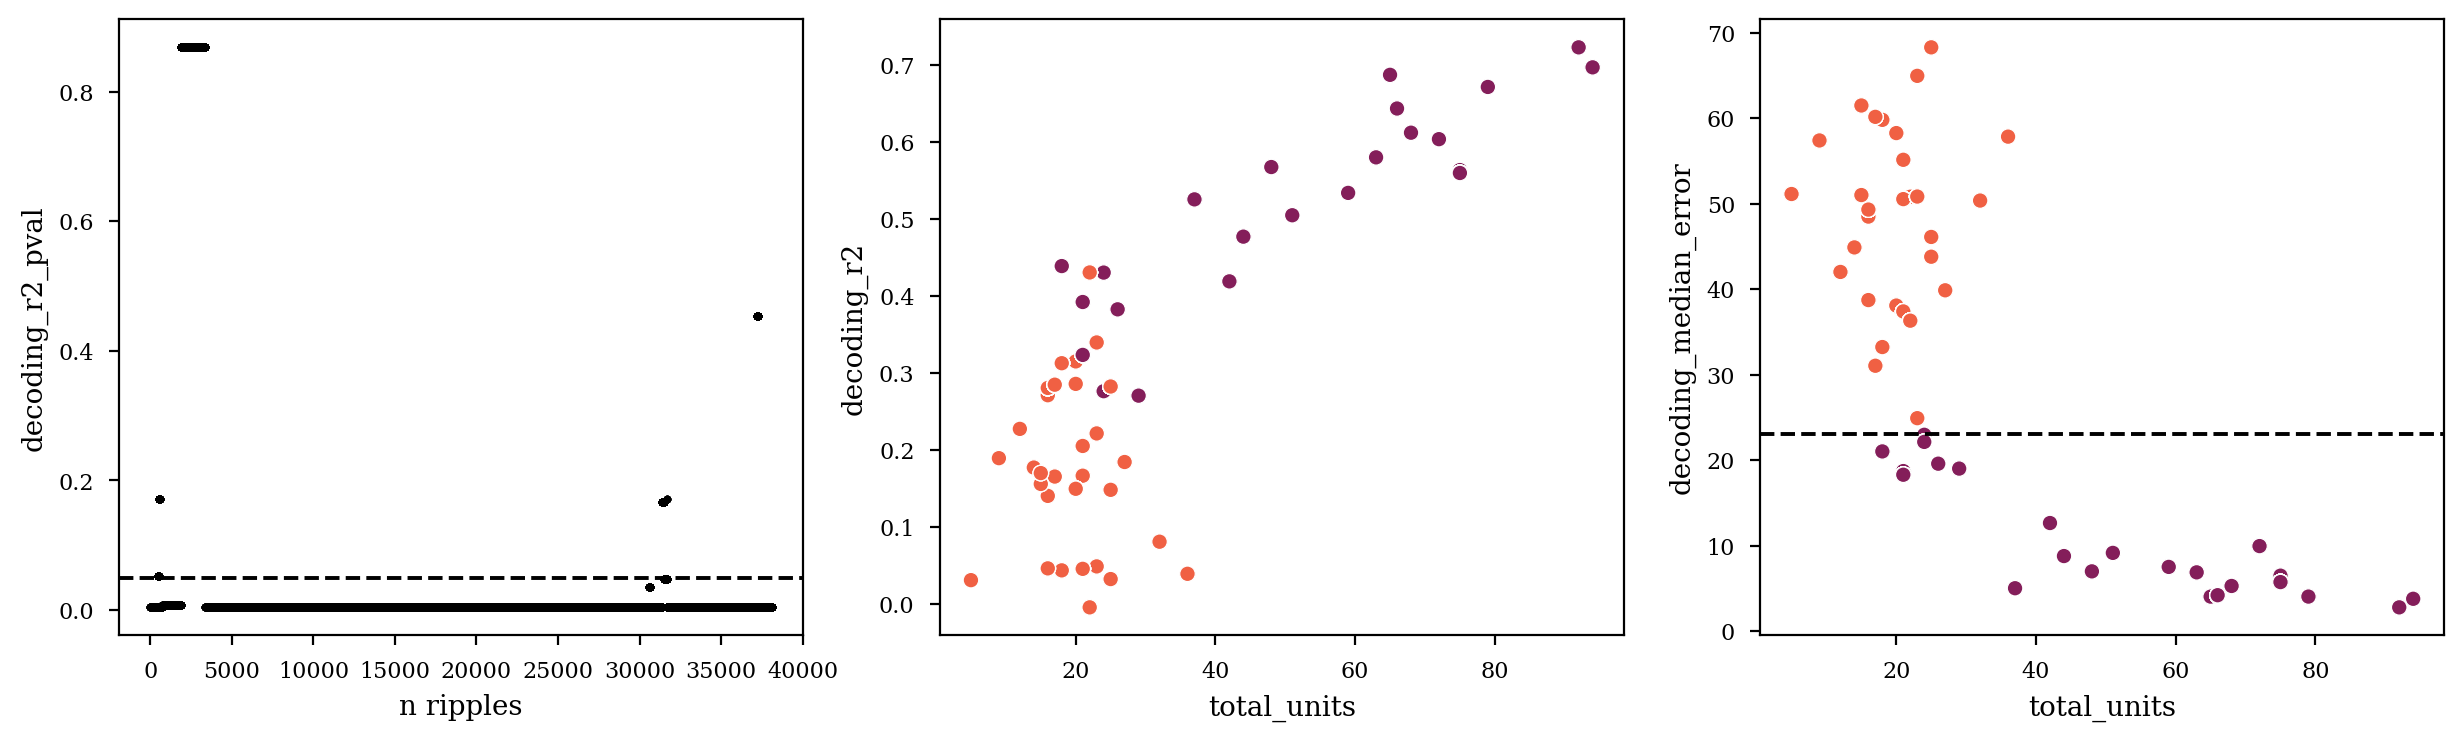

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].plot(df.decoding_r2_pval, '.k')
axs[0].set_ylabel('decoding_r2_pval')
axs[0].set_xlabel('n ripples')
axs[0].axhline(0.05, color='k', linestyle='--')

sns.scatterplot(x="total_units", y="decoding_r2",
                hue=df.decoding_median_error<23,
                data=df, ax=axs[1], legend=False, palette="rocket_r")

sns.scatterplot(x="total_units", y="decoding_median_error",
                hue=df.decoding_median_error<23,palette="rocket_r",
                data=df, ax=axs[2], legend=False)
# axs[2].legend(bbox_to_anchor=(1.1, 1.05))
axs[2].axhline(23, color='k', linestyle='--')

In [9]:
df.query("decoding_median_error < 23").basepath.unique()

array(['X:\\AD_sessions\\AZ10\\AZ10_210329_sess6',
       'X:\\AD_sessions\\AZ11\\AZ11_210422_sess7',
       'X:\\AD_sessions\\AZ11\\AZ11_210427_sess8',
       'X:\\AD_sessions\\AZ12\\AZ12_210317_sess2',
       'X:\\AD_sessions\\AZ12\\AZ12_210323_sess3',
       'X:\\AD_sessions\\AZ12\\AZ12_210325_sess4',
       'X:\\AD_sessions\\AZ12\\AZ12_210330_sess5',
       'X:\\AD_sessions\\AZ13\\AZ13_220930_sess7',
       'X:\\AD_sessions\\AZ13\\AZ13_221003_sess8',
       'X:\\AD_sessions\\AZ13\\AZ13_221007_sess12',
       'X:\\AD_sessions\\AZ18\\AZ18_221119_sess4',
       'X:\\AD_sessions\\Naz1\\Naz1_210324_sess5'], dtype=object)

In [10]:
alpha = 0.05
print('n ripples', df.shape[0])
print('pass by col swap', sum(df['score_pval_col_cycle'] < alpha))

print(df[df['score_pval_col_cycle'] < alpha].basepath.value_counts())
print('')
print('pass by time swap', sum(df['score_pval_time_swap'] < alpha))
print(df[df['score_pval_time_swap'] < alpha].basepath.value_counts())
print('')
print('pass by time swap & col swap', sum(
    (df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)))
print(df[(df['score_pval_time_swap'] < alpha) & (
    df['score_pval_col_cycle'] < alpha)].basepath.value_counts())

n ripples 38125
pass by col swap 4397
X:\AD_sessions\AZ12\AZ12_210323_sess3     1836
X:\AD_sessions\AZ12\AZ12_210325_sess4      694
X:\AD_sessions\Naz1\Naz1_210324_sess5      648
X:\AD_sessions\AZ11\AZ11_210427_sess8      622
X:\AD_sessions\AZ10\AZ10_210806_sess25     215
X:\AD_sessions\Naz1\Naz1_210811_sess26      54
X:\AD_sessions\AZ10\AZ10_210419_sess11      33
X:\AD_sessions\AZ16\AZ16_221109_sess10      29
X:\AD_sessions\AZ13\AZ13_221007_sess12      29
X:\AD_sessions\AZ13\AZ13_221003_sess8       29
X:\AD_sessions\AZ12\AZ12_210317_sess2       29
X:\AD_sessions\AZ13\AZ13_220930_sess7       25
X:\AD_sessions\AZ12\AZ12_210330_sess5       22
X:\AD_sessions\AZ10\AZ10_210412_sess9       19
X:\AD_sessions\AZ16\AZ16_221101_sess4       19
X:\AD_sessions\AZ11\AZ11_210325_sess1       18
X:\AD_sessions\AZ10\AZ10_210317_sess2       14
X:\AD_sessions\AZ11\AZ11_210422_sess7       10
X:\AD_sessions\AZ10\AZ10_210329_sess6        8
X:\AD_sessions\AZ18\AZ18_221119_sess4        8
X:\AD_sessions\AZ18\AZ

In [57]:
session = r"D:\github\ad_ied\data\replay_v1\X__AD_sessions_AD_10_sess25_AZ10_210806_sess25.pkl"
session = r"D:\github\ad_ied\data\replay_v1\X__AD_sessions_AD_10_sess25_AZ15_221102_sess8.pkl"
session = r"D:\github\ad_ied\results\replay_v1\X__AD_sessions_AD_10_sess25_Naz1_210324_sess5.pkl"
# session = r"D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ16_AZ16_221101_sess4.pkl"
# session = r"D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ16_AZ16_221104_sess7.pkl"
session = r"D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ12_AZ12_210323_sess3.pkl"
with open(session, 'rb') as f:
    results = pickle.load(f)


## place field example

In [45]:
import copy


In [46]:
# plt.plot()


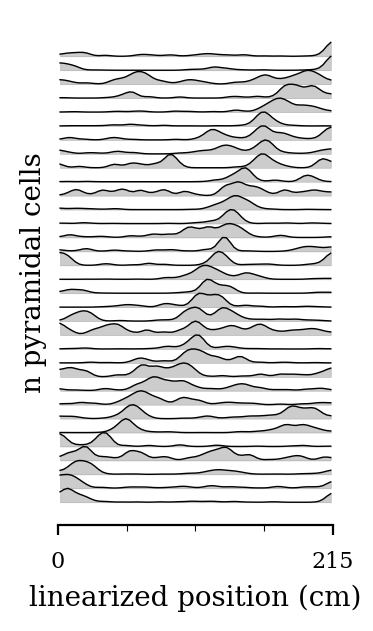

In [68]:
tc = copy.deepcopy(results["right_epochs"]['tc'])

n_peaks = []
for ratemap in tc.ratemap:
    peaks, _ = find_peaks(ratemap, height=1)
    n_peaks.append(len(peaks))

idx = (np.array(n_peaks) < 5) & (tc.max(axis=1) > 1)
tc = tc[idx].smooth(sigma=3)

w, h = functions.set_size('thesis', fraction=.3, subplots=(3, 1))

with npl.FigureManager(show=True, figsize=(w, h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(
        tc.reorder_units(), normalize=True, pad=1, fill=True,alpha=.2, color="k")

    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('linearized position (cm)')
    ax.set_ylabel('n pyramidal cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0, tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

# X__AD_sessions_AD_10_sess25_Naz1_210324_sess5
    # plt.savefig(os.path.join(fig_save_path,
    #     'place_cell_snake_example_right_epochs_Naz1_210324_sess5.svg'), dpi=300, bbox_inches='tight')
    # X__AD_sessions_AZ12_AZ12_210323_sess3
    plt.savefig(os.path.join(fig_save_path,
        'place_cell_snake_example_right_epochs_AZ12_210323_sess3.svg'), dpi=300, bbox_inches='tight')

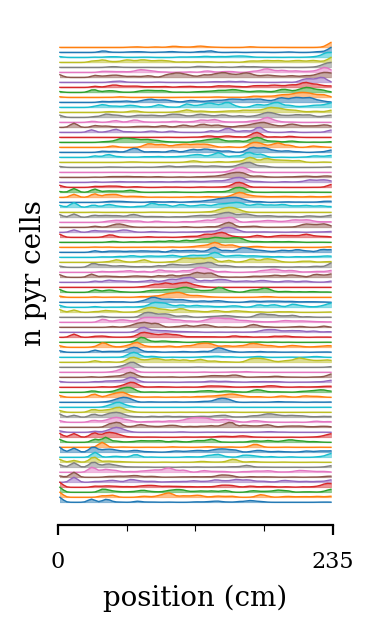

In [36]:
tc = results["left_epochs"]['tc']

w, h = functions.set_size('thesis', fraction=.3, subplots=(3, 1))

with npl.FigureManager(show=True, figsize=(w, h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(
        tc.reorder_units(), normalize=True, pad=1, fill=True,alpha=.5)

    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0, tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

In [ ]:
def plot_the_replays(curr_results, dir_epoch, replay_type):
    try:
        basepath = curr_results[dir_epoch]["session"]
    except:
        return
    animal_name = loading.get_animal_id(basepath)
    basename = os.path.basename(basepath)

    if curr_results[dir_epoch]["decoding_median_error"] >23:
        return
    idx = np.where(
        (curr_results[dir_epoch]["df"].score_pval_col_cycle < 0.05)
        & (curr_results[dir_epoch]["df"].score_pval_time_swap < 0.05)
        & (curr_results[dir_epoch]["df"].replay_type == replay_type)
    )[0]

    # idx = np.where(
    #     (curr_results[dir_epoch]["df"].replay_type == replay_type)
    # )[0]

    # if curr_results[dir_epoch]["decoding_r2_pval"] > 0.05:
    #     idx = []

    if len(idx) > 0:
        ax, fig = replay_fig.plot_all_replay(
            curr_results[dir_epoch]["bst_placecells"][idx],
            curr_results[dir_epoch]["sta_placecells"],
            curr_results[dir_epoch]["tc"],
            curr_results[dir_epoch]["tc"],
            vmax=0.1,
        )
        fig.savefig(
            os.path.join(
                r"D:\github\ad_ied\results\replay_examples",
                basename
                + "_"
                + animal_name
                + "_"
                + dir_epoch
                + "_"
                + replay_type
                + ".jpeg",
            ),
            dpi=300,
            bbox_inches="tight",
        )
        # plt.show(block=False)
        plt.close('all')


sessions = glob.glob(save_path + os.sep + "*.pkl")
for session in sessions:
    with open(session, "rb") as f:
        curr_results = pickle.load(f)

    if curr_results is None:
        continue
    for traj in curr_results.keys():
        plot_the_replays(curr_results, traj, "forward")
        plot_the_replays(curr_results, traj, "reverse")

In [ ]:
# forward_path = os.path.join(fig_save_path, 'replay_examples', 'forward')
# reverse_path = os.path.join(fig_save_path, 'replay_examples', 'reverse')

# if not os.path.isdir(forward_path):
#     os.mkdir(forward_path)
# if not os.path.isdir(reverse_path):
#     os.mkdir(reverse_path)

# sessions = glob.glob(save_path + os.sep + '*.pkl')
# for session in sessions:
#     with open(session, 'rb') as f:
#         results = pickle.load(f)

#     if results is None:
#         continue
    
#     basepath = results['right_epochs']['session']
#     animal_name = loading.get_animal_id(basepath)
#     basename = os.path.basename(basepath)
#     idx = np.where((results['right_epochs']['df'].score_pval_time_swap < 0.05) &
#                     (results['right_epochs']['df'].replay_type == 'forward'))[0]

#     if (results['right_epochs']["decoding_r2_pval"] > 0.05) | (results['right_epochs']["decoding_median_error"] > 30):
#         idx = []
            
#     if len(idx) > 0:
#         ax, fig = replay_fig.plot_all_replay(results['right_epochs']['bst_placecells'][idx],
#                                                 results['right_epochs']['sta_placecells'],
#                                                 results['right_epochs']['tc'],
#                                                 results['right_epochs']['tc'],
#                                                 vmax=.1)
#         fig.savefig(os.path.join(fig_save_path, 'replay_examples', forward_path,
#                     basename+'_'+animal_name+'_.jpeg'), dpi=300, bbox_inches='tight')
#         plt.close(fig)

#     idx = np.where((results['left_epochs']['df'].score_pval_time_swap < 0.05) &
#                     (results['left_epochs']['df'].replay_type == 'forward'))[0]

#     if (results['left_epochs']["decoding_r2_pval"] > 0.05) | (results['left_epochs']["decoding_median_error"] > 30):
#         idx = []
#     if len(idx) > 0:
#         ax, fig = replay_fig.plot_all_replay(results['left_epochs']['bst_placecells'][idx],
#                                                 results['left_epochs']['sta_placecells'],
#                                                 results['left_epochs']['tc'],
#                                                 results['left_epochs']['tc'],
#                                                 vmax=.1)
#         fig.savefig(os.path.join(fig_save_path, 'replay_examples', forward_path,
#                     basename+'_'+animal_name+'1_.jpeg'), dpi=300, bbox_inches='tight')
#         plt.close(fig)

#     idx = np.where((results['right_epochs']['df'].score_pval_time_swap < 0.05) &
#                     (results['right_epochs']['df'].replay_type == 'reverse'))[0]
#     if (results['right_epochs']["decoding_r2_pval"] > 0.05) | (results['right_epochs']["decoding_median_error"] > 30):
#         idx = []               
#     if len(idx) > 0:
#         ax, fig = replay_fig.plot_all_replay(results['right_epochs']['bst_placecells'][idx],
#                                                 results['right_epochs']['sta_placecells'],
#                                                 results['right_epochs']['tc'],
#                                                 results['right_epochs']['tc'],
#                                                 vmax=.1)
#         fig.savefig(os.path.join(fig_save_path, 'replay_examples', reverse_path,
#                     basename+'_'+animal_name+'_.jpeg'), dpi=300, bbox_inches='tight')
#         plt.close(fig)

#     idx = np.where((results['left_epochs']['df'].score_pval_time_swap < 0.05) &
#                     (results['left_epochs']['df'].replay_type == 'reverse'))[0]
#     if (results['left_epochs']["decoding_r2_pval"] > 0.05) | (results['left_epochs']["decoding_median_error"] > 30):
#         idx = []                
#     if len(idx) > 0:
#         ax, fig = replay_fig.plot_all_replay(results['left_epochs']['bst_placecells'][idx],
#                                                 results['left_epochs']['sta_placecells'],
#                                                 results['left_epochs']['tc'],
#                                                 results['left_epochs']['tc'],
#                                                 vmax=.1)
#         fig.savefig(os.path.join(fig_save_path, 'replay_examples', reverse_path,
#                     basename+'_'+animal_name+'1_.jpeg'), dpi=300, bbox_inches='tight')
#         plt.close(fig)